## How to do

## 데이터 정리

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [16]:
train = pd.read_csv('/Users/sanghyun/Desktop/Coding/PUBG_ML_Project/data/train_V2.csv')
train = reduce_mem_usage(train)

In [17]:
mydata = train.copy()
mydata2 = train.copy()

### 결측치 처리

In [7]:
print("* 데이터 타입, 데이터프레임 정보 확인")
print("----------------------------------------------------------------------")
train.info()
print()
print("* 데이터 칼럼별 결측값 확인")
print("----------------------------------------------------------------------")
train.isnull().sum()

* 데이터 타입, 데이터프레임 정보 확인
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446965 entries, 0 to 4446964
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int8   
 1   boosts           int8   
 2   damageDealt      float16
 3   DBNOs            int8   
 4   headshotKills    int8   
 5   heals            int8   
 6   killPlace        int8   
 7   kills            int8   
 8   longestKill      float16
 9   revives          int8   
 10  rideDistance     float16
 11  swimDistance     float16
 12  vehicleDestroys  int8   
 13  walkDistance     float16
 14  weaponsAcquired  int16  
 15  winPlacePerc     float16
 16  matchType2       int8   
 17  cat_numGroups    int8   
dtypes: float16(6), int16(1), int8(11)
memory usage: 106.0 MB

* 데이터 칼럼별 결측값 확인
----------------------------------------------------------------------


assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
kills              0
longestKill        0
revives            0
rideDistance       0
swimDistance       0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPlacePerc       0
matchType2         0
cat_numGroups      0
dtype: int64

In [8]:
# winPlacePerc의 결측치 처리
train.drop(train[train['winPlacePerc'].isna()==True].index, inplace=True)

#### overview

<AxesSubplot:>

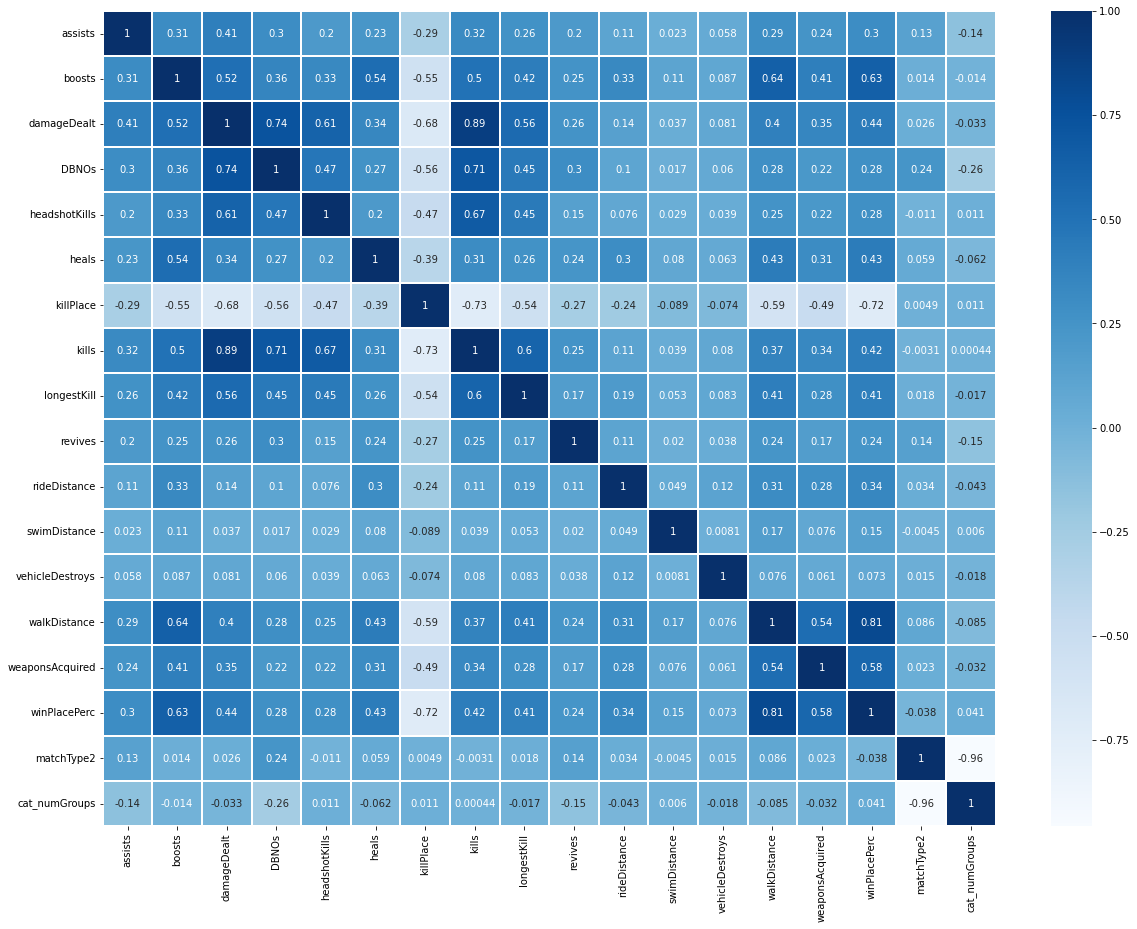

In [9]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(), annot=True, linewidths=2, cmap = 'Blues')

양의 상관관계
- walkDistance (0.81)
- boosts (0.63)
- weaponsAcquired (0.58)
<br><br>

음의 상관관계
- killPlace (-0.72)

### VIF

In [10]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
mydata3 = train.copy()

In [21]:
mydata3.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [22]:
X = mydata3[['killStreaks','kills']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature       VIF
0  killStreaks -0.000126
1        kills -0.000015


In [23]:
X = mydata3[['maxPlace','numGroups','DBNOs','assists','weaponsAcquired','walkDistance']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature          VIF
0         maxPlace  1049.388469
1        numGroups  1042.548322
2            DBNOs     1.521617
3          assists     1.357838
4  weaponsAcquired     3.978720
5     walkDistance     2.931762


In [24]:
X = mydata3[['maxPlace','numGroups','DBNOs','assists','weaponsAcquired','walkDistance']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature          VIF
0         maxPlace  1049.388469
1        numGroups  1042.548322
2            DBNOs     1.521617
3          assists     1.357838
4  weaponsAcquired     3.978720
5     walkDistance     2.931762


In [25]:
X = mydata3[['numGroups','DBNOs','assists','weaponsAcquired','walkDistance']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0        numGroups  2.102049
1            DBNOs  1.521606
2          assists  1.357756
3  weaponsAcquired  3.944634
4     walkDistance  2.931532


In [26]:
X = mydata3[['maxPlace','DBNOs','assists','weaponsAcquired','walkDistance']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0         maxPlace  2.115840
1            DBNOs  1.521568
2          assists  1.357811
3  weaponsAcquired  3.959767
4     walkDistance  2.931372


### EDA

#### matchType

In [27]:
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [28]:
pd.set_option('display.max_columns', 30)

train[(train['matchType'].str.contains('crash')==True)] # 6658 2인

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1093,c8ed6a171536e3,84748458aba82a,d4f1811cf6a04b,1,3,187.375,0,1,6,27,0,1,1,0.800781,904,crashfpp,50,45,1500,0,0.00,0,0.0,0,0,1342.000000,1,0,0.489746
1276,d3c4dd2e585d21,6af9bb6b56b722,16e6befa897b44,0,0,0.000,0,0,0,88,0,0,0,0.000000,892,crashfpp,47,45,1500,0,0.00,0,0.0,0,0,0.000000,0,0,0.000000
1790,28390372a2cc4f,c529d05da4597b,be945f2803814a,0,0,0.000,0,0,0,76,0,0,0,0.000000,915,crashfpp,50,50,1500,0,393.75,0,0.0,0,0,459.500000,0,0,0.204102
1905,fd39e397db5de4,67d1056e060313,ab05fc989cba70,0,2,0.000,0,0,0,44,0,0,0,0.000000,871,crashfpp,47,43,1500,0,6504.00,0,0.0,0,0,326.250000,2,0,0.652344
2111,1f2775b6f994ae,580347c80ae6a3,098b32c9c9ceb3,0,0,0.000,1,0,0,46,0,0,0,0.000000,905,crashfpp,36,33,1500,0,1124.00,0,0.0,1,0,1683.000000,2,0,0.371338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439168,f2b652c1c3480d,878b4c9a5c6724,f8dbb6134bf6fc,0,0,0.000,0,0,0,92,0,0,0,0.000000,916,crashfpp,49,48,1500,0,0.00,0,0.0,0,0,0.000000,0,0,0.000000
4440338,8df00ec3211cda,52d3feee3ff6d6,c35eb4e9d58f7c,2,0,220.750,0,1,0,18,0,1,1,2.421875,886,crashfpp,46,41,1500,0,1976.00,0,0.0,0,0,866.500000,2,0,1.000000
4440416,03242437424b00,d00910fbc45b1e,510cec3dea92d7,3,4,444.500,2,0,0,2,0,4,2,26.265625,882,crashfpp,31,30,1500,0,5152.00,2,0.0,0,0,23.109375,1,0,0.933105
4440956,9a366526fccde1,7172ba7ef85e3c,a0f8f127c472fc,2,6,219.375,1,0,1,14,0,1,1,1.194336,902,crashfpp,32,31,1500,0,4512.00,0,0.0,0,0,1059.000000,2,0,0.838867


In [29]:
pd.set_option('display.max_columns', 30)

train[(train['matchType'].str.contains('flare')==True)] #3223 4인

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1207,fb785deb59f2bc,4438f77ac9f2e6,33d976b454b843,0,4,577.0000,7,2,4,6,0,4,2,208.500000,1947,flaretpp,26,25,1500,1,2548.0000,0,0.0,0,1,2564.000000,6,0,0.799805
1524,b0fbbe07014fcd,7ce6194a5dd609,e330f44c528e6f,0,0,20.9375,0,0,0,55,0,0,0,0.000000,2031,flarefpp,17,17,1500,0,0.0000,0,0.0,0,0,13.640625,1,0,0.062500
6585,d2c938fa145684,c376a13f2593d4,306b7105f46fb1,0,6,159.7500,2,0,5,4,0,3,2,78.812500,1889,flarefpp,27,25,1500,0,4116.0000,0,0.0,0,0,2340.000000,6,0,0.807617
8033,7ec6701d1a9497,1e7b1e3440d76f,f1a007cdb3948e,0,0,0.0000,0,0,0,71,0,0,0,0.000000,1891,flarefpp,26,26,1500,0,0.0000,0,0.0,0,0,655.000000,10,0,0.239990
12845,4ac8d0521b049c,9abf85145ec8ba,4163d04f4beb17,0,2,56.6875,0,0,1,50,0,0,0,0.000000,1915,flaretpp,26,25,1500,0,5792.0000,0,0.0,0,0,1653.000000,4,0,0.560059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435289,df3ab1c1b087fd,7312e4825719e0,1a452d3a8d3302,0,5,120.8750,1,0,11,25,0,1,1,166.875000,1808,flaretpp,26,26,1500,0,2314.0000,0,0.0,1,0,3072.000000,10,0,0.720215
4436960,fe7ac3372c0fc2,e6b4302f12b8ed,9bee5835506a78,0,1,36.5625,0,0,1,60,0,0,0,0.000000,1820,flaretpp,27,27,1500,0,0.0000,0,0.0,0,0,1005.000000,2,0,0.269287
4438287,76e9ab41368cc8,5385baa97a54b2,6a646d26225c2d,0,0,0.0000,0,0,4,60,0,0,0,0.000000,1944,flaretpp,24,23,1500,0,0.0007,0,0.0,0,0,2680.000000,4,0,0.478271
4440119,6b8d629cec6ae7,085a3f1a616a83,8fcb66d54bb1a2,0,4,362.5000,1,1,8,21,0,1,1,9.945312,1932,flaretpp,26,26,1500,0,4944.0000,0,0.0,0,0,1965.000000,5,0,0.600098


<AxesSubplot:>

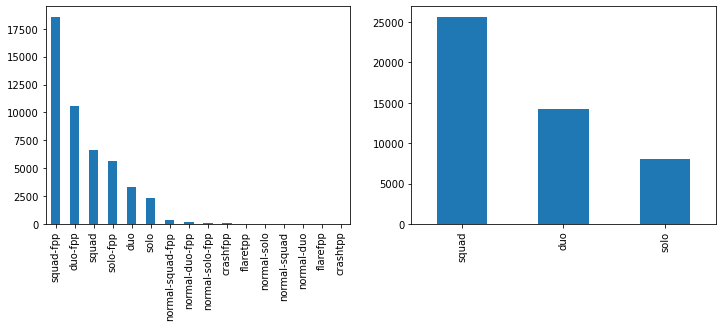

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

<AxesSubplot:>

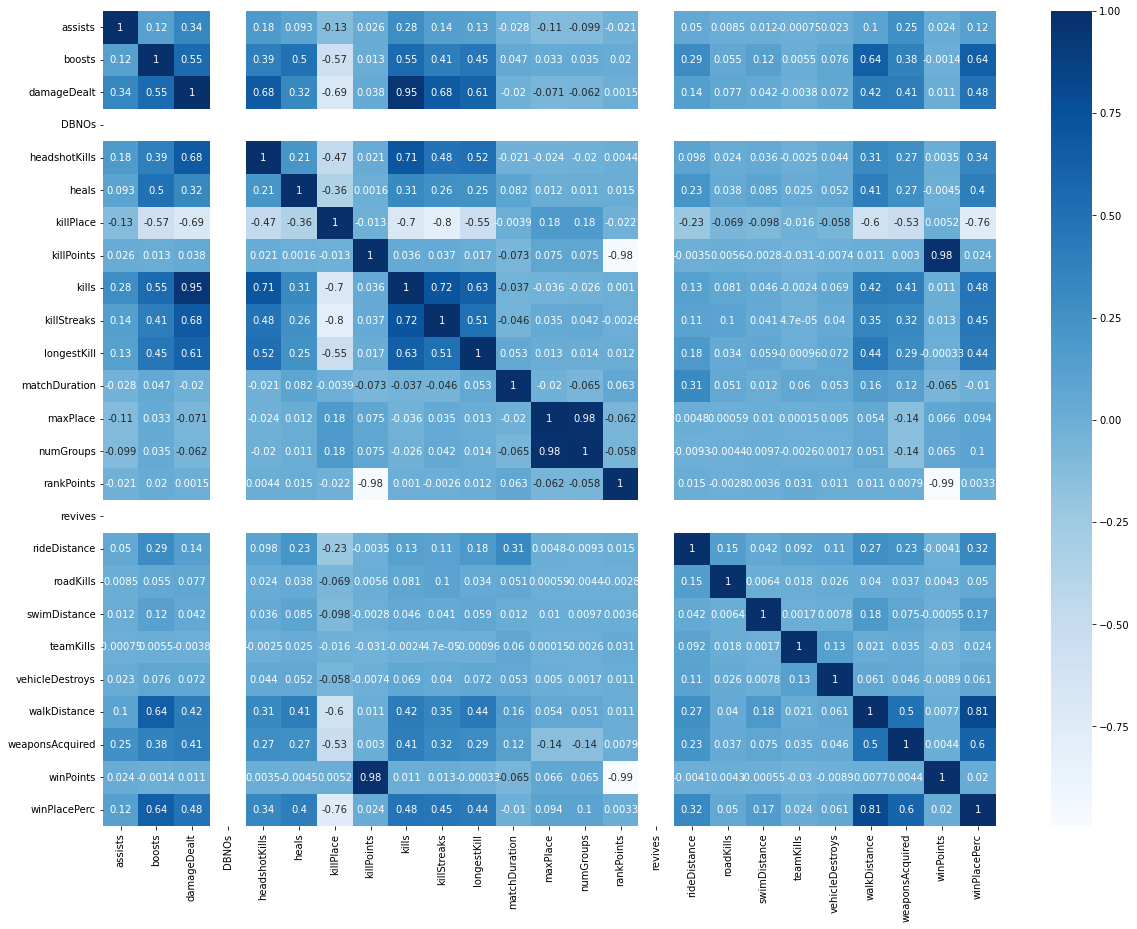

In [31]:
plt.subplots(figsize=(20,15))
sns.heatmap(train[train['matchType']=='solo'].corr(), annot=True, cmap='Blues')

<AxesSubplot:>

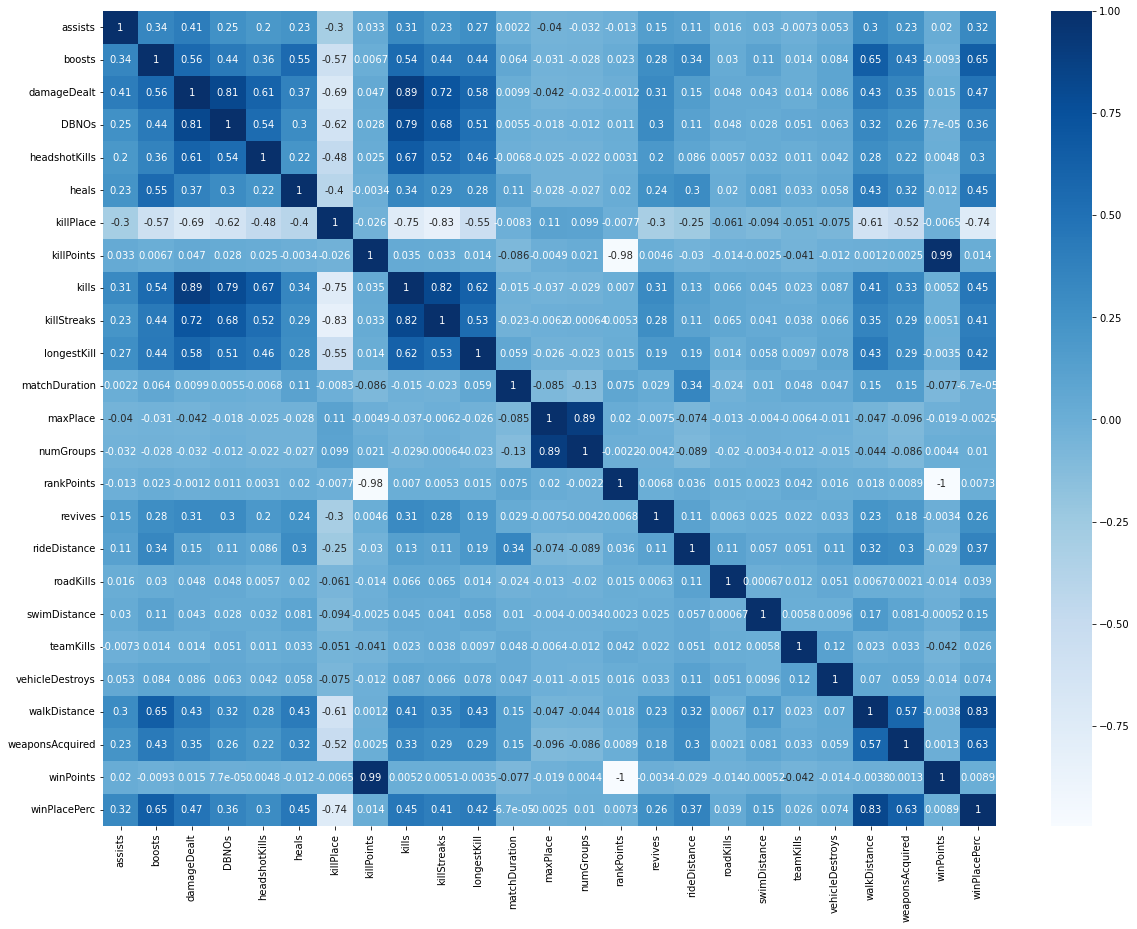

In [32]:
plt.subplots(figsize=(20,15))
sns.heatmap(train[train['matchType']=='duo'].corr(), annot=True, cmap='Blues')

<AxesSubplot:>

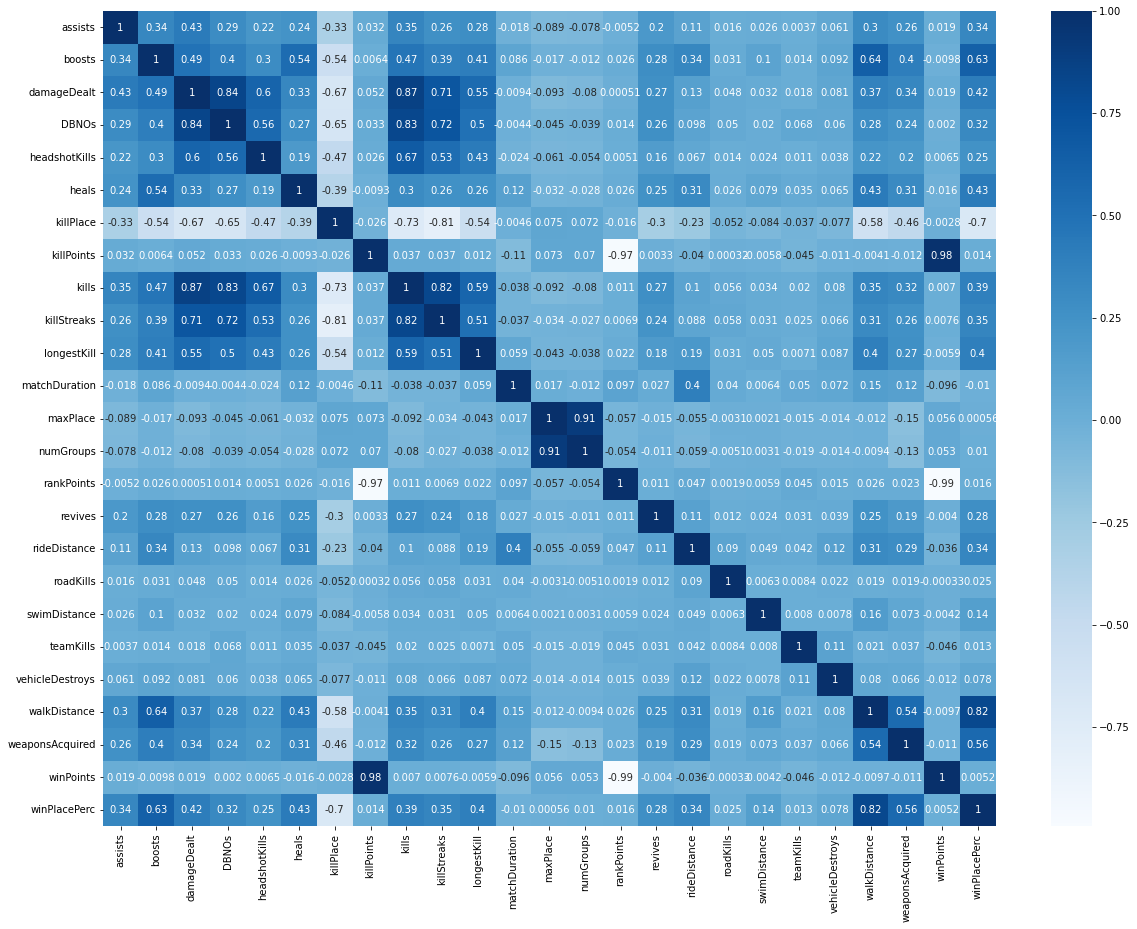

In [33]:
plt.subplots(figsize=(20,15))
sns.heatmap(train[train['matchType']=='squad'].corr(), annot=True, cmap='Blues')

#### Top 10

In [34]:
top10 = train[train["winPlacePerc"]>0.9]
print("TOP 10% overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills." 
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

TOP 10% overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.


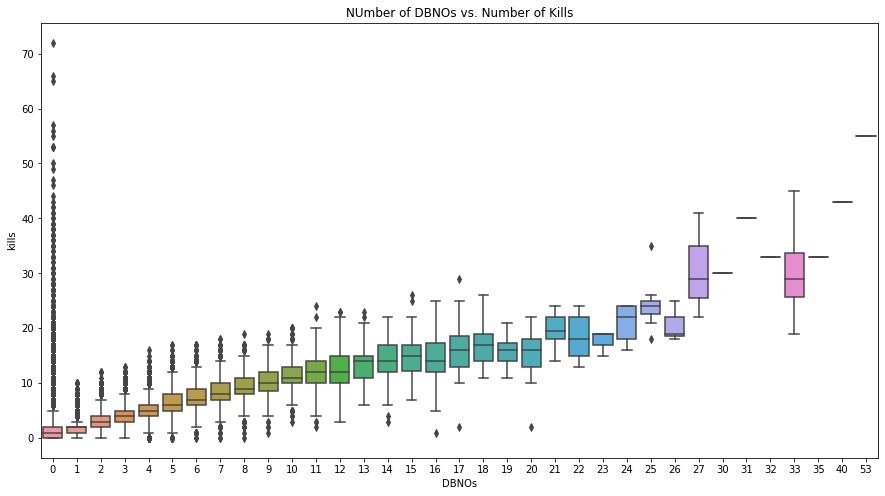

In [35]:
plt.figure(figsize=(15,8))
ax3 = sns.boxplot(x="DBNOs",y="kills", data = top10)
ax3.set_title("NUmber of DBNOs vs. Number of Kills")
plt.show()

<AxesSubplot:>

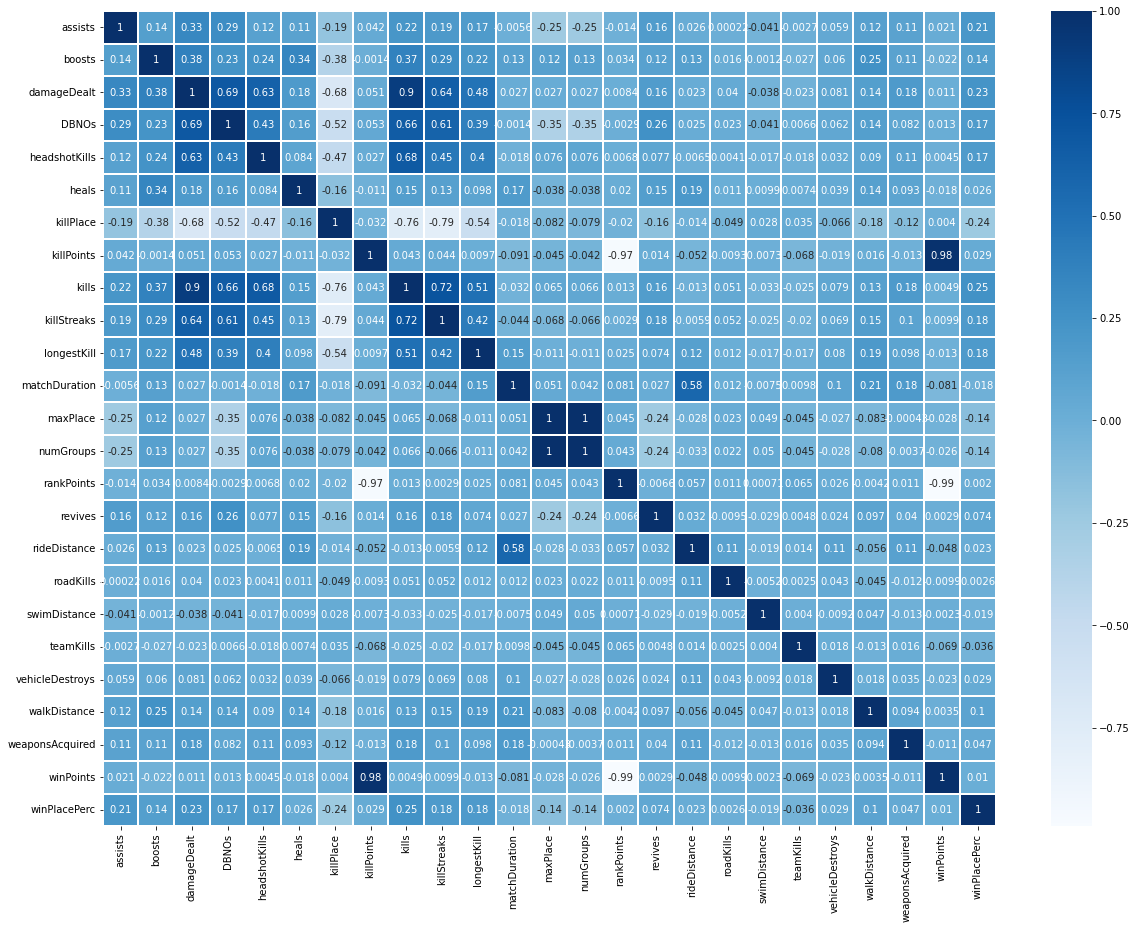

In [36]:
plt.subplots(figsize=(20,15))
sns.heatmap(top10.corr(), annot=True, linewidths=2, cmap = 'Blues')